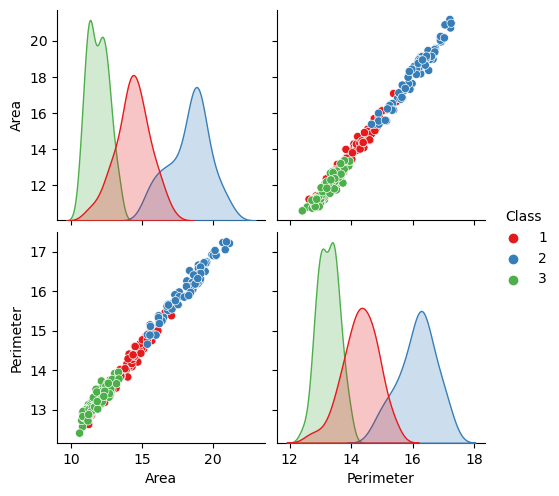

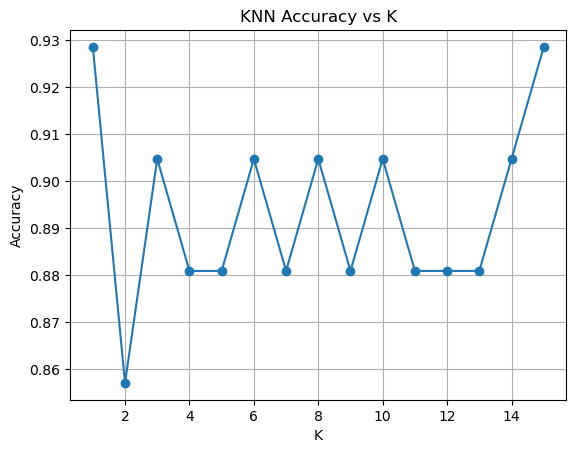

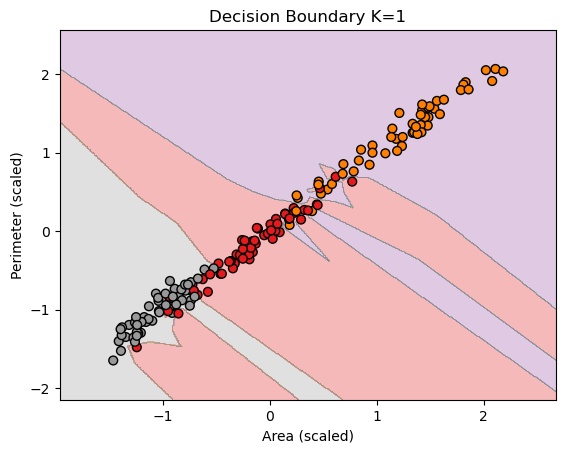

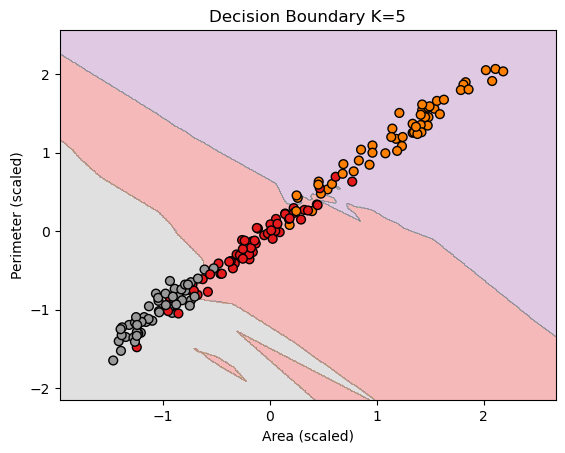

In [7]:
# KNN Tutorial on Seeds Dataset

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"
columns = ["Area","Perimeter","Compactness","Length_Kernel","Width_Kernel",
           "Asymmetry_Coeff","Groove_Length","Class"]
data = pd.read_csv(url, sep="\s+", names=columns)

# Features and labels
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Graph 1: Pairplot
sns.pairplot(data, vars=["Area","Perimeter"], hue="Class", palette="Set1")
plt.savefig("pairplot.png")
plt.show()

# Graph 2: Accuracy vs K
k_values = range(1,16)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(k_values, accuracies, marker='o')
plt.title("KNN Accuracy vs K")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.savefig("accuracy_vs_k.png")
plt.show()

# Graph 3 & 4: Decision boundaries (using 2 features)
X_vis = X_scaled[:, [0,1]] # Area & Perimeter
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.2, random_state=42)

def plot_decision_boundary(knn_model, X, y, title):
    x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
    y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5
    xx, yy = np.meshgrid(np.arange(x_min,x_max,0.01), np.arange(y_min,y_max,0.01))
    Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
    plt.scatter(X[:,0], X[:,1], c=y, s=40, edgecolor='k', cmap=plt.cm.Set1)
    plt.xlabel("Area (scaled)")
    plt.ylabel("Perimeter (scaled)")
    plt.title(title)
    plt.show()

# Decision boundary K=1
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train_vis, y_train_vis)
plot_decision_boundary(knn1, X_train_vis, y_train_vis, "Decision Boundary K=1")

# Decision boundary K=5
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train_vis, y_train_vis)
plot_decision_boundary(knn5, X_train_vis, y_train_vis, "Decision Boundary K=5")


In [ ]:
https://github.com/sriloki4887/24061216_Individual-Assignment.git